In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [18]:
df=pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\tourism\\KPI_touristique.csv")
trands=pd.read_csv("src/Google Trend/data/trends_test.csv")

In [20]:
df=df[:184]
trands=trands[:len(trands)-2]
trands['date'] = pd.to_datetime(trands['date'])
df['Date'] = pd.to_datetime(df['Date'])


In [21]:
df

,Date,TES,MRE,Total Arrivées,Nuité,Taux d'occupation
0,2010-01-01,291608.0,216485.0,508093.0,NaN,NaN
1,2010-02-01,327017.0,214346.0,541363.0,NaN,NaN
2,2010-03-01,437338.0,234940.0,672278.0,NaN,NaN
3,2010-04-01,432338.0,232737.0,665075.0,NaN,NaN
4,2010-05-01,430974.0,241339.0,672313.0,NaN,NaN
...,...,...,...,...,...,...
179,2024-12-01,784192.0,753742.0,1537934.0,1950797.0,48.0
180,2025-01-01,624848.0,640349.0,1265197.0,1748788.0,44.0
181,2025-02-01,761377.0,634800.0,1396177.0,1797178.0,50.0
182,2025-03-01,768739.0,583272.0,1352011.0,1754640.0,40.0


In [22]:
df.isnull().sum()

Date                  0
TES                   0
MRE                  12
Total Arrivées       12
Nuité                24
Taux d'occupation    72
dtype: int64

In [14]:
def filter_tourism_keywords(keywords):
    """Garde uniquement les mots-clés touristiques pertinents"""
    import re
    
    # Mots-clés à EXCLURE (non-touristiques)
    EXCLUDE = [
        r'\b(oil|argan|beauty|cosmetic|shampoo|body|hair)\b',
        r'\b(recipe|food|chilli|chocolate|cake|cooking)\b',
        r'\b(bbc|news|article|blog|instagram|facebook)\b',
        r'\b(price|buy|shop|store|amazon|ebay)\b',
        r'\b(job|work|salary|visa application)\b',
    ]
    
    # Mots-clés à INCLURE (touristiques)
    INCLUDE = [
        r'\b(hotel|riad|resort|accommodation|stay|booking)\b',
        r'\b(flight|airport|airline|ticket|travel)\b',
        r'\b(tour|excursion|visit|guide|itinerary|trip)\b',
        r'\b(marrakech|casablanca|fez|chefchaouen|essaouira|tangier|agadir)\b',
        r'\b(sahara|desert|atlas|medina|kasbah|souk)\b',
        r'\b(weather|temperature|climate|best time)\b',
        r'\b(things to do|places to visit|attractions)\b',
        r'\b(restaurant|cuisine|dining)\b',
        r'\b(beach|mountain|hiking|surfing|activities)\b',
    ]
    
    filtered = []
    for kw in keywords:
        kw_lower = kw.lower()
        
        # Exclure si non-touristique
        if any(re.search(pattern, kw_lower) for pattern in EXCLUDE):
            continue
        
        # Inclure si touristique
        if any(re.search(pattern, kw_lower) for pattern in INCLUDE):
            filtered.append(kw)
    
    return filtered

In [23]:
trands=trands.rename(columns={"date":"Date"})
l=trands.columns.tolist()
l.remove("Date")

In [24]:
keywords_cleaned = filter_tourism_keywords(l)
print(len(keywords_cleaned))
trands=trands[["Date"] + keywords_cleaned]
data=pd.merge(trands, df[['Date','TES']], on="Date")

346


In [25]:
data

,Date,merzouga tour,morocco travel update,morocco covid travel,marrakech weather forecast,longue vie hotel marrakech,wydad casablanca,restaurant marrakech kassel,flights to casablanca morocco,marrakech meteo,...,riad marrakesch,casablanca morocco,fez,frankfurt casablanca royal air maroc,cheap flights to agadir from london,new balance casablanca,casablanca berlin,pcr test for travel london,temperature marrakech,TES
0,2010-01-01,0,0,0,79,0,5,0,72,50,...,49,44,48,0,0,0,77,0,53,291608.0
1,2010-02-01,0,0,0,100,0,5,0,52,68,...,81,49,50,0,0,0,100,0,54,327017.0
2,2010-03-01,0,0,0,96,0,6,0,49,60,...,52,47,56,0,0,0,88,0,47,437338.0
3,2010-04-01,0,0,0,50,0,9,0,53,46,...,29,43,54,0,0,0,62,0,30,432338.0
4,2010-05-01,0,0,0,45,0,9,0,61,41,...,38,43,55,0,0,0,78,0,25,430974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2024-10-01,77,0,0,16,70,10,0,70,82,...,29,61,75,0,0,11,50,0,80,871449.0
178,2024-11-01,78,0,0,16,59,11,0,73,58,...,25,61,72,0,0,10,35,0,79,720467.0
179,2024-12-01,72,0,0,15,48,16,0,61,57,...,32,60,73,0,0,12,43,0,80,784192.0
180,2025-01-01,89,0,0,15,100,8,0,87,49,...,39,63,70,0,0,9,52,0,100,624848.0


In [26]:
l=data.columns.tolist()
l.remove("Date")
data=data[l]

### Calcul des corrélations avec décalages temporels


In [27]:
dataframe = data

target_col = 'TES'  
keyword_cols = [col for col in dataframe.columns if col != target_col]

results = []


for keyword in keyword_cols:
    correlations = {}
    
    # Tester différents lags (0 à 12 mois)
    for lag in range(1, 13):
    # Décaler la série du keyword
    
        keyword_lagged = dataframe[keyword].shift(lag)

        # Supprimer les valeurs manquantes
        valid_idx = ~(keyword_lagged.isna() | dataframe[target_col].isna())

        if valid_idx.sum() > 10:  # S'assurer qu'il y a assez de données
            # Calculer la corrélation de Pearson
            corr, p_value = pearsonr(
                keyword_lagged[valid_idx], 
                dataframe[target_col][valid_idx]
            )
            correlations[lag] = {
                'correlation': corr,
                'p_value': p_value
            }
    
    # Trouver le lag optimal (corrélation maximale)
    if correlations:
        best_lag = max(correlations.keys(), 
                      key=lambda x: abs(correlations[x]['correlation']))
        best_corr = correlations[best_lag]['correlation']
        best_pvalue = correlations[best_lag]['p_value']
        
        results.append({
            'keyword': keyword,
            'best_lag': best_lag,
            'correlation': best_corr,
            'p_value': best_pvalue,
            'all_correlations': correlations
        })

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('correlation', 
                                    key=abs, 
                                    ascending=False)

print(results_df[['keyword', 'best_lag', 'correlation', 'p_value']])

C:\Users\masta\AppData\Local\Temp\ipykernel_14180\94221215.py:23: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(


                               keyword  best_lag  correlation       p_value
219                          marrakech         1     0.822252  1.098132e-45
196                  marrakech airport         1     0.803963  2.917048e-42
209                    morocco airport         1     0.775273  1.466496e-37
222                          essaouira         1     0.766241  3.196517e-36
39                      marrakech souk         1     0.763409  8.164355e-36
..                                 ...       ...          ...           ...
227  moroccan restaurant covent garden         6     0.043567  5.658781e-01
321            fez moroccan restaurant         8     0.042951  5.736157e-01
6          restaurant marrakech kassel         1          NaN           NaN
86        reasons not to visit morocco         1          NaN           NaN
328            6 day morocco itinerary         1          NaN           NaN

[346 rows x 4 columns]


### Sélection des variables finales

In [28]:
# Filtrer les keywords avec corrélation >= 70% (0.7)
threshold = 0.7
selected_keywords = results_df[
    abs(results_df['correlation']) >= threshold
].copy()

print(f"\nNombre de keywords sélectionnés avec corrélation >= 70% : {len(selected_keywords)}")
print("\nKeywords sélectionnés:")
print(selected_keywords[['keyword', 'best_lag', 'correlation']])

# Créer le dataset final avec les variables décalées
final_df = dataframe[[target_col]].copy()

for _, row in selected_keywords.iterrows():
    keyword = row['keyword']
    lag = row['best_lag']
    #final_df[f"{keyword}_lag{lag}"] = dataframe[keyword].shift(lag)
    final_df[f"{keyword}"] = dataframe[keyword].shift(lag)
# Supprimer les lignes avec valeurs manquantes
final_df = final_df.dropna()

#print(f"\nDataset final: {final_df.shape}")
#final_df[selected_keywords['keyword'].head(3)].to_csv('dataset_final_avec_lags.csv', index=False)
print()
print("="*80)
print("\nTop 3 keywords sélectionnés:")
print(selected_keywords[['keyword', 'best_lag', 'correlation']].head(3))


Nombre de keywords sélectionnés avec corrélation >= 70% : 11

Keywords sélectionnés:
                           keyword  best_lag  correlation
219                      marrakech         1     0.822252
196              marrakech airport         1     0.803963
209                morocco airport         1     0.775273
222                      essaouira         1     0.766241
39                  marrakech souk         1     0.763409
99                   vol marrakech         1     0.734368
12         aeropuerto de marrakech         1     0.722272
7    flights to casablanca morocco         1     0.719793
92             barcelona marrakech         1     0.712670
80            restaurant marrakech         1     0.708413
180     best time to visit vietnam         1     0.700815


Top 3 keywords sélectionnés:
               keyword  best_lag  correlation
219          marrakech         1     0.822252
196  marrakech airport         1     0.803963
209    morocco airport         1     0.775273


In [29]:
matrice = data[["TES","marrakech airport","marrakech","marrakech souk","essaouira","morocco airport"]].corr()
print(matrice)

                        TES  marrakech airport  marrakech  marrakech souk  \
TES                1.000000           0.816287   0.872586        0.791196   
marrakech airport  0.816287           1.000000   0.874794        0.853146   
marrakech          0.872586           0.874794   1.000000        0.876434   
marrakech souk     0.791196           0.853146   0.876434        1.000000   
essaouira          0.833520           0.771579   0.870591        0.735739   
morocco airport    0.772509           0.883207   0.842813        0.784845   

                   essaouira  morocco airport  
TES                 0.833520         0.772509  
marrakech airport   0.771579         0.883207  
marrakech           0.870591         0.842813  
marrakech souk      0.735739         0.784845  
essaouira           1.000000         0.797037  
morocco airport     0.797037         1.000000  


<Axes: >

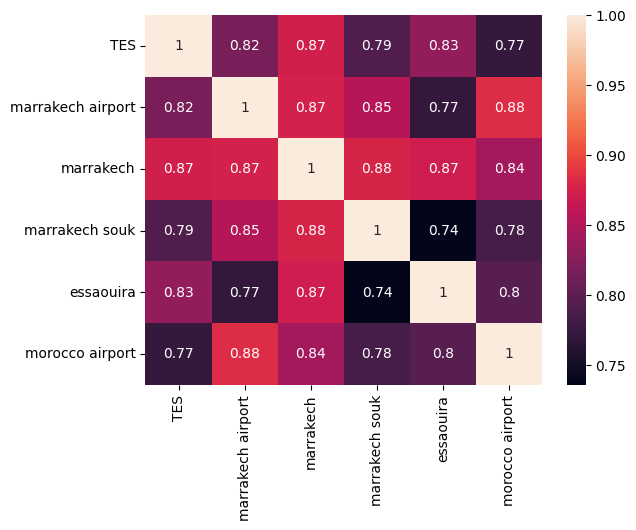

In [30]:
sns.heatmap(matrice,annot=True)